In [19]:
#%load README.md

Reproducible research : Python implementation of SparseHebbianLearning
======================================================================

![Animation of the formation of RFs during aSSC learning.]
(http://invibe.net/cgi-bin/index.cgi/SparseHebbianLearning?action=AttachFile&do=get&target=ssc.gif)

This piece of code is distributed under the terms of the GNU General Public License (GPL), check http://www.gnu.org/copyleft/gpl.html if you have not red the term of the license yet.

*  (!)  tl;dr : [Download the code](https://github.com/meduz/SHL_scripts/archive/master.zip). Or directly from the command-line, do

```
wget https://github.com/meduz/SHL_scripts/archive/master.zip
unzip master.zip -d SHL_scripts
cd SHL_scripts/
python learn.py
```

Object
------

* This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).

* this has been published as Perrinet, Neural Computation (2010) (see  http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl ):

```bibtex
@article{Perrinet10shl,
    Author = {Perrinet, Laurent U.},
    Doi = {10.1162/neco.2010.05-08-795},
    Journal = {Neural Computation},
    Keywords = {Neural population coding, Unsupervised learning, Statistics of natural images, Simple cell receptive fields, Sparse Hebbian Learning, Adaptive Matching Pursuit, Cooperative Homeostasis, Competition-Optimized Matching Pursuit},
    Month = {July},
    Number = {7},
    Title = {Role of homeostasis in learning sparse representations},
    Url = {http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl},
    Volume = {22},
    Year = {2010},
    Annote = {Posted Online March 17, 2010.},
}
```

* all comments and bug corrections should be submitted to Laurent Perrinet at Laurent.Perrinet@gmail.com
* find out updates on http://invibe.net/LaurentPerrinet/SparseHebbianLearning

Get Ready!
----------

 Be sure to have :

* a computer (tested on Mac, Linux) with ``python`` + ``numpy`` (on macosx, you may consider using [HomeBrew](https://github.com/meduz/dotfiles/blob/master/init/osx_brew_python.sh),
* grab the sources from the [Download the code](https://github.com/meduz/SHL_scripts/archive/master.zip),
* These scripts should be platform independent, however, there is a heavy bias toward unix users when generating figures.

Contents
--------


 * ``README.md`` : this file
 * ``learn.py`` : the scripts (see Contents.m  for a script pointing to the different experiments)
 * ``ssc.py`` : the individual experiments
 * ``IMAGES_sparsenet.mat`` : the image files (if absent, they get automagically downloaded from [this link](http://invibe.net/LaurentPerrinet/SparseHebbianLearning?action=AttachFile|this page).
* ``matlab_code`` : some obsolete matlab code


Some useful code tidbits
------------------------

* get the code with CLI  ``
wget https://github.com/meduz/SHL_scripts/archive/master.zip
``.
* decompress  ``
unzip master.zip -d SHL_scripts
``
* get to the code ``
cd SHL_scripts
``

* run the main script ``
python learn.py
``

* remove SSC related files to start over ``
rm -f IMAGES_*.mat.pdf *.hdf5
``

Changelog
---------
* 1.1 : 14-06-18
  * documentation
  * dropped Matlab support

* 1.0 : initial release, 27-Oct-2011



In [9]:
import numpy as np
import pylab
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
import ssc

How does it work?
=================

First, we import data patches -


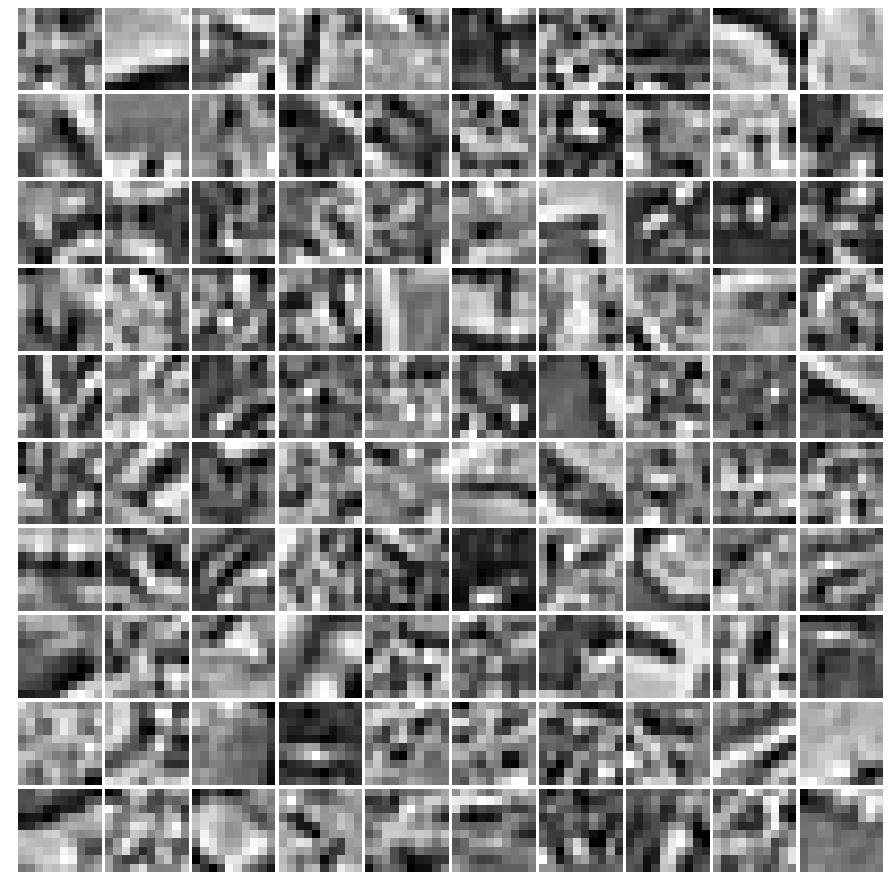

In [11]:
images_file="data/IMAGES_sparsenet.mat"
patch_width = 10
patch_height = 10
sqrtN = 10

image_data = ssc.ImageData(images_file=images_file, patch_width=patch_width, patch_height=patch_height)
subplotpars = matplotlib.figure.SubplotParams(left=0., right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig = plt.figure(figsize=(12, 12), subplotpars=subplotpars)
for col in range(sqrtN**2):
    a = fig.add_subplot(sqrtN, sqrtN, col + 1)
    x = image_data.draw()
    a.imshow(x.reshape(patch_width, patch_height),
             interpolation="nearest", cmap=plt.cm.gray)
    a.axis("off")

In [12]:
%timeit x = image_data.draw()

1000 loops, best of 3: 804 µs per loop


In [15]:
# for each patch, knowing a dictionary, we decompose it 

iters=100
num_basis = 196
coder = ssc.Ssc()
coder.load_hdf5("data/sparsenet.hdf5", iters=iters)
a = coder.sparsify(x)
print('Sparse vector ', a)
print('Residual = ', x - np.dot(coder.psi, a))
print('L0, SE = ', np.nonzero(a)[0].size*1./num_basis, np.dot((x - np.dot(coder.psi, a)).T, x - np.dot(coder.psi, a))/np.dot(x.T, x))

Sparse vector  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Residual =  [ -3.33209544e-01  -1.21667831e-01   1.30456546e-02   7.63189884e-03
   2.20533119e-01   4.23012436e-01   3.75247569e-01   2.53687904e-01
   2.32267694e-01   1.99969009e-01  -3.

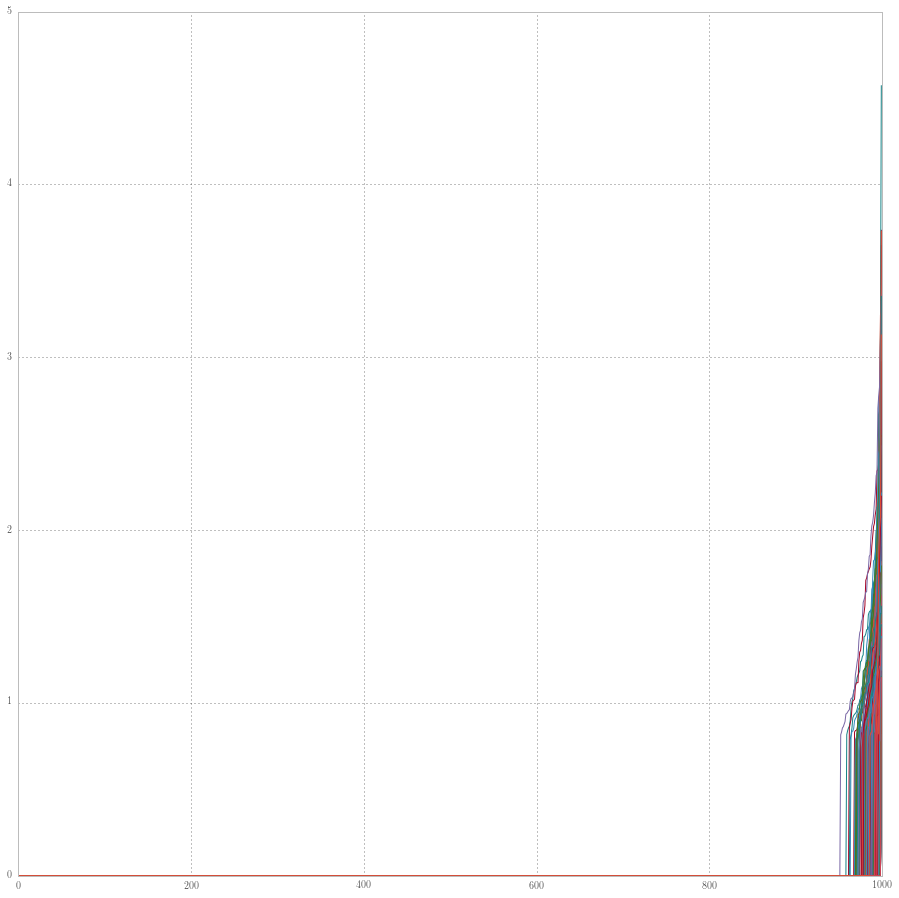

In [16]:
# one issue during learning is that some filters may always win, breaking the efficiency of the population of filters
iters=1000
S = np.zeros((coder.psi.shape[1], iters)) 
for i_iter in range(iters):
    x = image_data.draw()
    S[:, i_iter] = np.absolute(coder.sparsify(x))
    
#fig = plt.figure(figsize=(12, 12))
#plt.plot(np.arange(a.size), S.mean(axis=1))
#plt.plot(np.arange(a.size), np.percentile(S, 90, axis=1), 'r--')
#plt.plot(np.arange(a.size), np.percentile(S, 99, axis=1), 'r--')



# showing the sorted vector of the mean energy for each filter show they are not well distributed
#fig = plt.figure(figsize=(12, 12), subplotpars=subplotpars)
#for col in range(S.shape[0]):
#    a = fig.add_subplot(np.sqrt(S.shape[0]), np.sqrt(S.shape[0]), col + 1)
#    a.plot(np.sort(S[col]))
#    a.axis("off")
    
fig = plt.figure(figsize=(12, 12), subplotpars=subplotpars)
a = fig.add_subplot(111)
for col in range(S.shape[0]):
    a.plot(np.sort(S[col]))


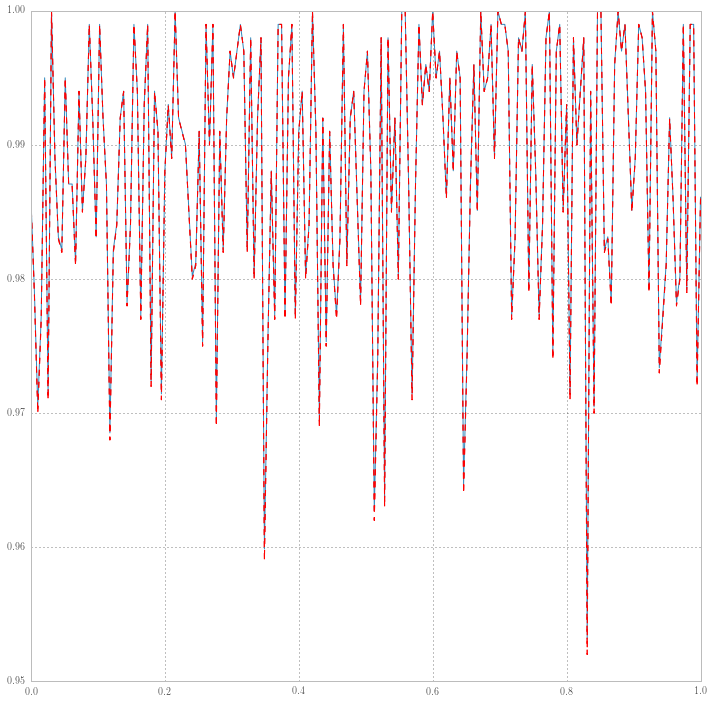

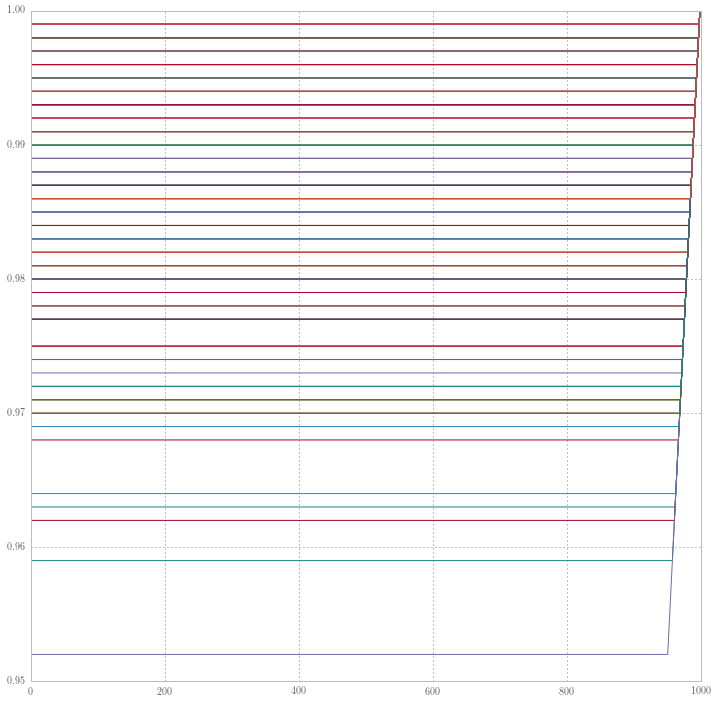

In [17]:
# what we need is some sort of histogram normalization
def histeq(s):
    #use linear interpolation of cdf to find new pixel values
    # use the fact that the sorted coeffs gize the inverse cdf
    z = np.interp(s, np.sort(s), np.linspace(0, 1., s.size))
    return z

Z = np.zeros((S.shape[0], iters)) 
for i_filter in range(S.shape[0]):
    #s_cdf, s_bins = cdf(S[i_filter, :])
    Z[i_filter, :] = histeq(S[i_filter, :])
    
fig = plt.figure(figsize=(12, 12))
plt.plot(np.linspace(0, 1, S.shape[0]), Z.mean(axis=1))
plt.plot(np.linspace(0, 1, S.shape[0]), np.percentile(Z, 25, axis=1), 'r--')
plt.plot(np.linspace(0, 1, S.shape[0]), np.percentile(Z, 75, axis=1), 'r--')

# showing the sorted vector of the z-score for each filter show they are now well distributed
fig = plt.figure(figsize=(12, 12))
a = fig.add_subplot(111)
for col in range(Z.shape[0]):
    a.plot(np.sort(Z[col]))



Results
=======

progressbar could not be imported
learning with the  sparsenet  database 


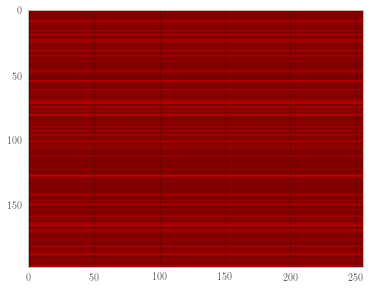

In [14]:
%run learn.py


## Scanning some parameters

In [26]:
%%writefile scan.py

from multiprocessing import cpu_count, Pool
n_cpus = cpu_count()
p = Pool(n_cpus)

from learn import *
matfile = "data/IMAGES_sparsenet.mat"

def f(nu_homeo):
    name = 'nu_homeo' + str(nu_homeo).replace('.', '_')
    print "learning with  ", name
    ssc_learn(images_file=matfile, iters=iters, name=name,
              nu_homeo=nu_homeo,
              load_file="data/" + name + ".hdf5",
              save_file="data/" + name + ".hdf5")
p.map(f, np.logspace(-3, 0, n_cpus, base=10))

def f(nu):
    name = 'nu_' + str(nu).replace('.', '_')
    print "learning with  ", name
    ssc_learn(images_file=matfile, iters=iters, name=name,
              nu=nu,
              load_file="data/" + name + ".hdf5",
              save_file="data/" + name + ".hdf5")
p.map(f, np.logspace(-3, 0, n_cpus, base=10))

def f(graded_solver):
    name = 'graded_solver_' + graded_solver
    print "learning with  ", name
    ssc_learn(images_file=matfile, iters=iters, name=name,
              graded_solver=graded_solver,
              load_file="data/" + name + ".hdf5",
              save_file="data/" + name + ".hdf5")
p.map(f, ["matching_pursuit""first_order" "least_squares"])

Overwriting scan.py


In [ ]:
%%bash
python scan.py

Book keeping
============

In [10]:
!ls data
!rm -f data/*hdf5
!ls data


IMAGES_icabench_decorr.mat  IMAGES_sparsenet.mat  README  sparsenet (music's conflicted copy 2014-06-21).hdf5  sparsenet.hdf5
IMAGES_icabench_decorr.mat  IMAGES_sparsenet.mat  README


This documentation is written as a single file notebook. 
Latest developpment is hosted on [github](https://github.com/meduz/SHL_scripts).

In [3]:
! ipython nbconvert index.ipynb

[NbConvertApp] Using existing profile dir: u'/Users/lolo/.ipython/profile_default'
[NbConvertApp] Converting notebook index.ipynb to html
[NbConvertApp] Support files will be in index_files/
[NbConvertApp] Loaded template full.tpl
[NbConvertApp] Writing 190192 bytes to index.html


In [77]:
! git s

?? matlab_code/matlab_src/


In [9]:
%%writefile .gitignore
.ipynb_checkpoints
index_files
data
results

Overwriting .gitignore


In [81]:
!git d *py

In [78]:
! git add matlab_code/matlab_src/

In [79]:
!git commit -am' BO''s homeostasis? '; git push

[master 5a2a599]  BOs homeostasis?
 38 files changed, 3010 insertions(+)
 create mode 100644 matlab_code/matlab_src/add_log.m
 create mode 100644 matlab_code/matlab_src/applytofig.m
 create mode 100755 matlab_code/matlab_src/cgf.mexa64
 create mode 100755 matlab_code/matlab_src/cgf.mexglx
 create mode 100644 matlab_code/matlab_src/cgf.mexmac
 create mode 100644 matlab_code/matlab_src/cgf.mexmaci
 create mode 100755 matlab_code/matlab_src/display_network.m
 create mode 100644 matlab_code/matlab_src/exportfig.m
 create mode 100755 matlab_code/matlab_src/exportfig.zip
 create mode 100755 matlab_code/matlab_src/fig2pdf.m
 create mode 100644 matlab_code/matlab_src/get_patch.m
 create mode 100644 matlab_code/matlab_src/getpid.c
 create mode 100755 matlab_code/matlab_src/getpid.mexa64
 create mode 100755 matlab_code/matlab_src/getpid.mexmaci
 create mode 100644 matlab_code/matlab_src/kurt.m
 create mode 100755 matlab_code/matlab_src/pdf_cnv.sh
 create mode 100755 matlab_code/matlab_src/perfor

In [14]:
%magic

In [21]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, pylab

Installed version_information.py. To use it, type:
  %load_ext version_information
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.8 (default, Jul  2 2014, 10:14:46) [GCC 4.2.1 Compatible Apple LLVM 5.1 (clang-503.0.40)]
IPython 2.1.0
OS posix [darwin]
numpy 1.8.1
pylab pylab
<tr><td colspan='2'>Thu Jul 10 14:30:25 2014 CEST</td></tr>